In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageOps

mnist = tf.keras.datasets.mnist # Taking a dataset that is already preinstalled

# x_train holds all the data, y_train holds all teh labels of the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train, x_test = x_train / 255.0, x_test / 255.0 # Scaling the data, so it improves the accuracy of the machine learning model
# Talk about the test data set
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
os.chdir(r"C:\Users\Kevin Tang\Documents\TensorFlow")
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [ ]:
x_train.shape
x_test.shape

In [ ]:
y_train.shape
y_test.shape

In [ ]:
y_test
y_test.shape

In [ ]:
first_pic = x_train[0]
print(first_pic)
first_pic.shape

In [6]:
first_pic.max()

1.0

In [2]:
a = np.array([[[1,2,3,4], [5,6,7,8]]])
print(a)
# Checking number of elements in each dimensions
print(a.shape)
a.ndim

[[[1 2 3 4]
  [5 6 7 8]]]


(1, 2, 4)

The image at the 0th index is: 


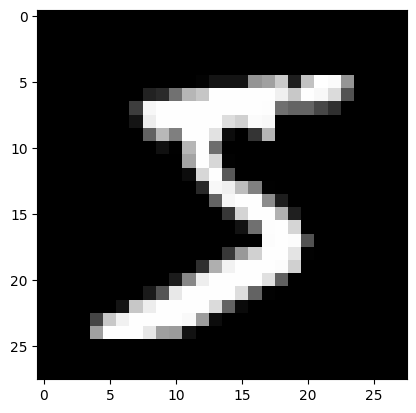

In [4]:
image_num = 0

print(f"The image at the {image_num}th index is: ")
plt.imshow(x_train[image_num], cmap="Greys_r")

In [8]:
zero = 0
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
seven = 0
eight = 0
nine = 0

for i in y_train:
    if i == 0:
        zero += 1
    elif i == 1:
        one += 1
    elif i == 2:
        two += 1
    elif i == 3:
        three += 1
    elif i == 4:
        four += 1
    elif i == 5:
        five += 1
    elif i == 6:
        six += 1
    elif i == 7:
        seven += 1
    elif i == 8:
        eight += 1
    elif i == 9:
        nine += 1


print(np.unique(y_train)) # Can see that all numbers from 0 to 9 is included
print(one, two, three, four, five, six, seven, eight, nine)

from collections import Counter
Counter(y_train)

[0 1 2 3 4 5 6 7 8 9]
6742 5958 6131 5842 5421 5918 6265 5851 5949


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

[7.83192204e-01 8.11964265e-01 5.57598241e-01 5.11689094e-01
 7.60866392e-01 3.37950652e-01 8.02561727e-01 3.90861026e-01
 8.08323220e-01 7.39763240e-01 7.99715631e-01 9.42067833e-01
 9.07316332e-01 3.05473830e-01 7.33362763e-01 4.54195192e-01
 4.08649620e-01 4.10887783e-02 6.02821854e-01 7.83212266e-01
 9.57710593e-01 6.50498530e-01 4.73427942e-01 2.15306036e-01
 7.96652980e-01 4.99603575e-01 5.67007175e-02 3.12818485e-02
 1.71773034e-01 6.61067317e-01 7.44897691e-01 4.14780254e-02
 8.51044073e-01 5.00826101e-01 9.75914821e-01 3.68661993e-02
 2.99076316e-01 2.59014360e-01 1.29805211e-01 8.18799736e-01
 8.11948427e-01 1.67071238e-01 2.90758753e-01 2.73480885e-01
 7.92424646e-02 5.95301331e-01 9.25160203e-02 6.44727469e-01
 5.54322777e-01 3.21384805e-01 5.79103530e-01 3.93021325e-01
 9.82867892e-01 6.04583044e-01 5.00700529e-01 6.83126561e-01
 6.61774391e-01 5.98603519e-01 7.90522134e-01 7.06859816e-01
 5.43572656e-01 2.75472068e-01 5.07636672e-01 3.82005046e-01
 6.43805488e-01 7.908634

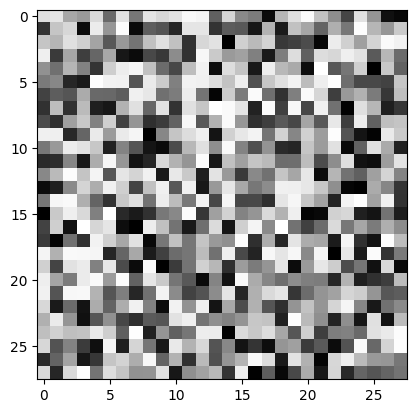

In [6]:
# SKIP THIS
import random

random_list = [random.uniform(0,1) for i in range(784)]
random_array = np.array(random_list)

print(f"{random_array} \nBefore Reshape: {random_array.shape}")

random_array = random_array.reshape((28,28))
print(f"After Reshaping: {random_array.shape}")
plt.imshow(random_array, cmap='Greys_r')

# Building Model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Here is the model
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(units = 16, activation="relu"),
                    Dense(units = 16, activation="relu"),
                    Dense(10, activation = "sigmoid")
]) # talk about the model.summary details



model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 16)                12560     
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [15]:
# More complicated one with more neurons and an extra layer

# model = Sequential([
#                     Flatten(input_shape=(28, 28)), # fully conv if not flatten, not using cnn, so no way to put all data into dense layer
#                     Dense(units = 128, activation="relu"),
#                     Dense(units = 128, activation="relu"),
#                     Dense(units = 128, activation="relu"),
#                     Dense(20, activation = "softmax")
# ])

In [16]:
model.compile(optimizer='adam', # Used for the gradients
              loss='sparse_categorical_crossentropy', # Our cost function, which we are using cross-entropy
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/30


2022-11-11 09:17:57.304097: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


118/118 [==============================] - 1s 4ms/step - loss: 1.2788 - accuracy: 0.6041 - val_loss: 0.5728 - val_accuracy: 0.8595
Epoch 2/30
118/118 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8794 - val_loss: 0.3528 - val_accuracy: 0.9023
Epoch 3/30
118/118 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.9066 - val_loss: 0.2878 - val_accuracy: 0.9181
Epoch 4/30
118/118 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9208 - val_loss: 0.2600 - val_accuracy: 0.9238
Epoch 5/30
118/118 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.9278 - val_loss: 0.2377 - val_accuracy: 0.9318
Epoch 6/30
118/118 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9326 - val_loss: 0.2258 - val_accuracy: 0.9335
Epoch 7/30
118/118 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9361 - val_loss: 0.2185 - val_accuracy: 0.9365
Epoch 8/30
118/11

 # Building Model V2

In [19]:
# Already ran at the very beginning, included it here to separate second model from first

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scaling the data, so it improves the accuracy of the machine learning model
x_train, x_test = x_train / 255.0, x_test / 255.0

# x_train_flattened = x_train.reshape(len(x_train), 28*28)
# x_test_flattened = x_test.reshape(len(x_test), 28*28)

print(x_test[0].shape)

(28, 28)
<class 'numpy.ndarray'>


In [20]:
a = np.array([1,2])
print(a.shape)
print(np.expand_dims(a, 1))
print(np.expand_dims(a, 1).shape)

(2,)
[[1]
 [2]]
(2, 1)


In [ ]:
# model = Sequential([
#     Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape = (28, 28, 1)), # dont need epand dimms after removing the 1
#     MaxPooling2D(pool_size = (2, 2)),
#     Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'),
#     MaxPooling2D(pool_size = (2, 2)),
#     Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation='relu'),
#     Flatten(),
#     Dropout(0.2),
#     Dense(784, activation='relu'),
#     Dense(400, activation='relu'),
#     Dense(10, activation='sigmoid')
# ])
#
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#
# model.summary()
#
# history = model.fit(np.expand_dims(x_train, 3), y_train, epochs=30, batch_size=512, validation_data=(np.expand_dims(x_test, 3), y_test))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

#Save/Load

In [15]:
model.save("MNIST.h5")

In [ ]:
model = tf.keras.models.load_model('MNIST.h5')

#Prediction

In [24]:
# Evaluating the accuracy on the "test" dataset
model.evaluate(np.expand_dims(x_test, 3), y_test)


313/313 [==============================] - 3s 8ms/step - loss: 0.2199 - accuracy: 0.9329


[0.21993272006511688, 0.9329000115394592]

313/313 [==============================] - 3s 8ms/step
[0.15888491 0.19276445 0.7102909  0.9760058  0.05003359 0.02392331
 0.00133493 0.9999993  0.29693204 0.96479017]
0.15888 0.19276 0.71029 0.97601 0.05003 0.02392 0.00133 1.0 0.29693 0.96479  -------------------------------------------------------- 
The model predicts 7, with a 99.99992847442627% certainty.


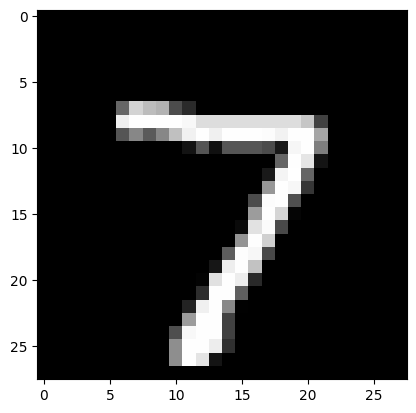

In [22]:
# shows you an array of how likely of what number the number is
y_predicted = model.predict(np.expand_dims(x_test, 3))

# Prints the probability of each number
print(y_predicted[0])
for i in y_predicted[0]:
    print(round(i, 5), end=" ")

print(" -------------------------------------------------------- ")

print(f"The model predicts {np.argmax(y_predicted[0])}, with a {y_predicted[0].max() * 100}% certainty.")

plt.imshow(x_test[0], cmap="Greys_r")

# Try It Yourself

In [23]:
!git clone https://gist.github.com/8409b3feec20f159d8a50b0a811d3bca.git colab_draw

Cloning into 'colab_draw'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.


In [ ]:
%run collab_draw/draw.py

draw(filename = "number.png", w=400, h=400, line_width=15)

(1, 28, 28, 1)
1/1 [==============================] - 0s 73ms/step
[0.9996913  0.01318118 0.1530338  0.7158881  0.00469761 0.9686713
 0.43339187 0.8662213  0.8127691  0.7767523 ]
The model predicts 0, with a 99.96913075447083% certainty rate


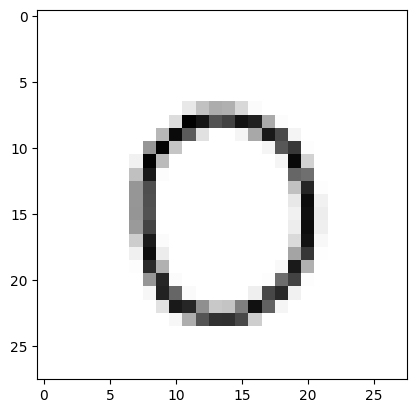

In [25]:
img = Image.open("number.png")

# Removes the alpha channel, because it wouldn't work
def remove_transparency(img, bg_colour=(255, 255, 255)):
    if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
        alpha = img.convert('RGBA').split()[-1]
        bg = Image.new("RGBA", img.size, bg_colour + (255,))
        bg.paste(img, mask=alpha)
        return bg
    else:
        return img

def predict(img):
    img = ImageOps.invert(img) # invert image from white to black to black to white
    img = img.resize((28,28))
    img_array = np.array(img) / 255 # Recall, we need to normalize to get best results
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=3)
    print(img_array.shape) # (1, 28, 28, 1) (batch, width, height, rgb)
    y_pred = model.predict(img_array)
    return y_pred

remove_transparency(img=Image.open("number.png")).save("number.png")
img = Image.open("number.png")
img = img.convert("L") # Makes the image black and white

image = plt.imread("number.png")
plt.imshow(image)
y_pred = predict(img)

print(*y_pred)
print(f"The model predicts {np.argmax(y_pred)}, with a {y_pred.max() * 100}% certainty rate")

plt.imshow(img, cmap="Greys_r")
plt.imshow(img.resize((28, 28)), cmap="Greys_r")

# y_predicted = model.predict(np.expand_dims(img, 3))
# print(y_predicted[0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import os

os.chdir(r"C:\Users\Kevin Tang\Documents\TensorFlow")